In [1]:
import mediapipe as mp
import cv2

2024-10-30 22:06:44.040724: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-30 22:06:44.763988: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

libEGL warning: MESA-LOADER: failed to open iris: /usr/lib/dri/iris_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open iris: /usr/lib/dri/iris_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open swrast: /usr/lib/dri/swrast_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open iris: /usr/lib/dri/iris_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open iris: /usr/lib/dri/iris_dri.so: cannot open shared object file: 

Handedness: [classification {
  index: 0
  score: 0.980051458
  label: "Left"
}
]
hand_landmarks: 0.4348359704017639


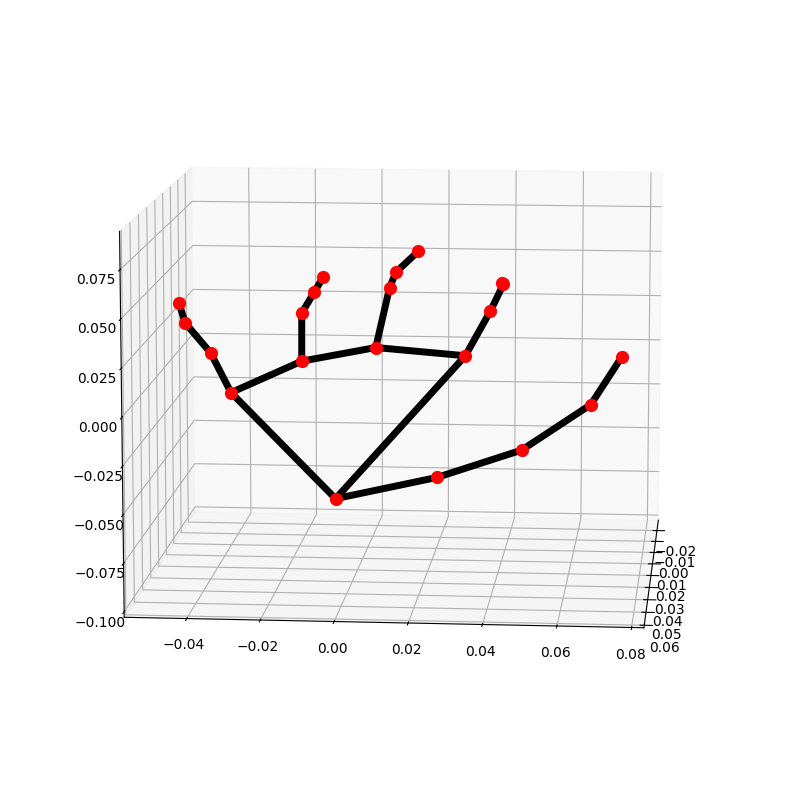

In [3]:
IMAGE_FILES = ["hand.jpg"]
with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.5) as hands:
  for idx, file in enumerate(IMAGE_FILES):
    # Read an image, flip it around y-axis for correct handedness output (see
    # above).
    image = cv2.flip(cv2.imread(file), 1)
    # Convert the BGR image to RGB before processing.
    results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Print handedness and draw hand landmarks on the image.
    print('Handedness:', results.multi_handedness)
    if not results.multi_hand_landmarks:
      continue
    image_height, image_width, _ = image.shape
    annotated_image = image.copy()
    for hand_landmarks in results.multi_hand_landmarks:
      print('hand_landmarks:',  f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x}')
    #   print(
    #       f'Index finger tip coordinates: (',
    #       f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width}, '
    #       f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_height})'
    #   )
      mp_drawing.draw_landmarks(
          annotated_image,
          hand_landmarks,
          mp_hands.HAND_CONNECTIONS,
          mp_drawing_styles.get_default_hand_landmarks_style(),
          mp_drawing_styles.get_default_hand_connections_style())
    cv2.imwrite(
        '/tmp/annotated_image' + str(idx) + '.png', cv2.flip(annotated_image, 1))
    # Draw hand world landmarks.
    if not results.multi_hand_world_landmarks:
      continue
    for hand_world_landmarks in results.multi_hand_world_landmarks:
      mp_drawing.plot_landmarks(
        hand_world_landmarks, mp_hands.HAND_CONNECTIONS, azimuth=5)

In [4]:
import pickle
with open('x_val.pkl', 'rb') as inp:
    x_list = pickle.load(inp)

with open('x_val_tremor.pkl', 'rb') as inp:
    x_list_tremor = pickle.load(inp)

In [5]:
x_list_tremor

[0.4747416079044342,
 0.4405454993247986,
 0.40851497650146484,
 0.38280025124549866,
 0.36089733242988586,
 0.340595543384552,
 0.3240312933921814,
 0.3096490800380707,
 0.30127617716789246,
 0.28763115406036377,
 0.2788911461830139,
 0.26998186111450195,
 0.2591398060321808,
 0.2542423605918884,
 0.2489793598651886,
 0.24675916135311127,
 0.24675258994102478,
 0.25213778018951416,
 0.260917067527771,
 0.2748013734817505,
 0.29082876443862915,
 0.3074120879173279,
 0.32203173637390137,
 0.3376173973083496,
 0.353556364774704,
 0.3650626540184021,
 0.37809842824935913,
 0.3894779682159424,
 0.3994581401348114,
 0.40681254863739014,
 0.41224196553230286,
 0.4154980778694153,
 0.4151779115200043,
 0.4147879481315613,
 0.41427740454673767,
 0.41368386149406433,
 0.41300609707832336,
 0.40997788310050964,
 0.4080078601837158,
 0.4062880277633667,
 0.4062930941581726,
 0.4082730710506439,
 0.4054851233959198,
 0.40349042415618896,
 0.4016474783420563,
 0.40214216709136963,
 0.40149316191673

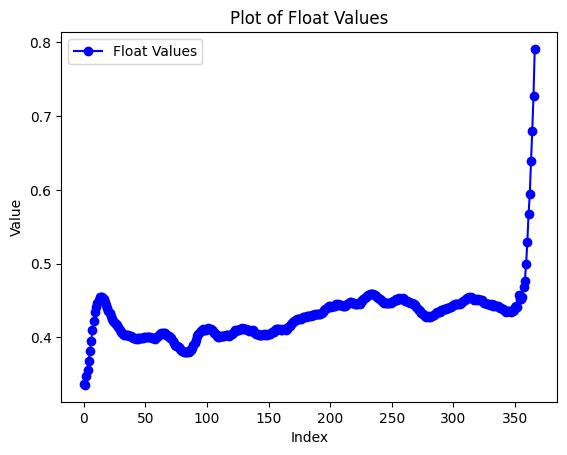

In [6]:
import matplotlib.pyplot as plt

# List of float values
# x_list = [0.1, 0.5, 1.3, 2.7, 3.6, 4.4, 5.2, 6.1, 5.8, 5.3]

# Plotting the list
plt.plot(x_list, marker='o', linestyle='-', color='b', label="Float Values")

# Adding titles and labels
plt.title("Plot of Float Values")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()

# Display the plot
plt.show()


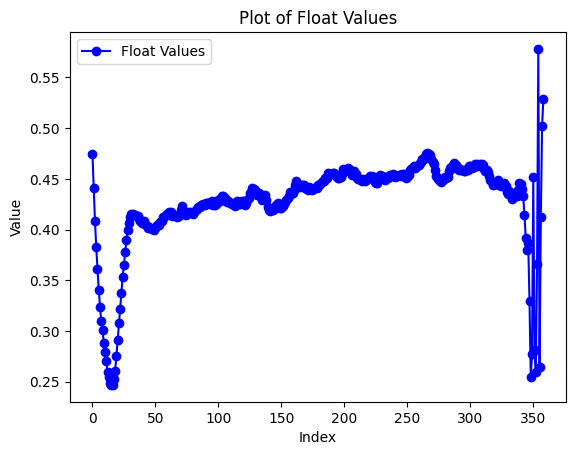

In [7]:
import matplotlib.pyplot as plt

# List of float values
# x_list = [0.1, 0.5, 1.3, 2.7, 3.6, 4.4, 5.2, 6.1, 5.8, 5.3]

# Plotting the list
plt.plot(x_list_tremor, marker='o', linestyle='-', color='b', label="Float Values")

# Adding titles and labels
plt.title("Plot of Float Values")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()

# Display the plot
plt.show()

In [8]:
import numpy as np
Q1 = np.percentile(x_list, 45)
Q3 = np.percentile(x_list, 55)
IQR = Q3 - Q1

In [9]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


filtered_values_normal = [x for x in x_list if lower_bound <= x <= upper_bound]


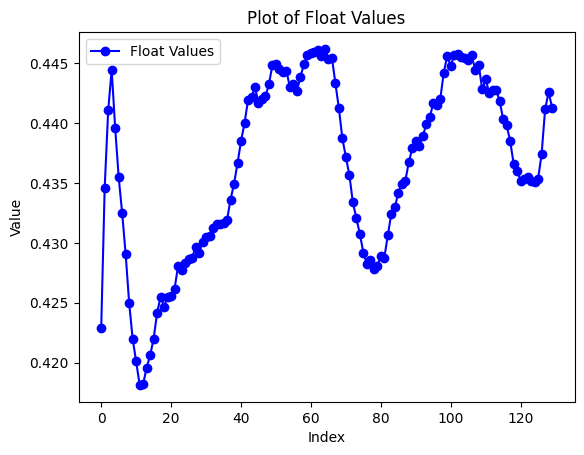

In [10]:


# List of float values
# x_list = [0.1, 0.5, 1.3, 2.7, 3.6, 4.4, 5.2, 6.1, 5.8, 5.3]

# Plotting the list
plt.plot(filtered_values_normal, marker='o', linestyle='-', color='b', label="Float Values")

# Adding titles and labels
plt.title("Plot of Float Values")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()

# Display the plot
plt.show()

In [11]:
import numpy as np
Q1 = np.percentile(x_list_tremor, 45)
Q3 = np.percentile(x_list_tremor, 55)
IQR = Q3 - Q1

In [12]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_values_tremor = [x for x in x_list_tremor if lower_bound <= x <= upper_bound]


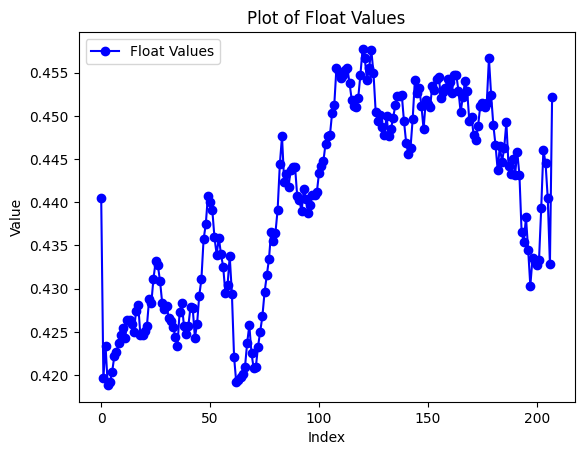

In [13]:
plt.plot(filtered_values_tremor, marker='o', linestyle='-', color='b', label="Float Values")

# Adding titles and labels
plt.title("Plot of Float Values")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()

# Display the plot
plt.show()

In [14]:
import statistics
normal_var = statistics.variance(filtered_values_normal)
tremor_var = statistics.variance(filtered_values_tremor)
normal_std = statistics.stdev(filtered_values_normal)
tremor_std = statistics.stdev(filtered_values_tremor)

In [15]:
print(normal_var,normal_std,tremor_var, tremor_std)

5.669709474836571e-05 0.0075297473230093 0.00013252766652966597 0.011512066127749005


In [40]:
tremor_var

0.00013010449053121778